HW2 
G01314326
Kaustubh Karanjkar
CS584

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.sparse as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
import xgboost as xgb
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Train and Test Data Processing

In [5]:
train = pd.read_csv("train_2.txt", delimiter="\n", header= None, engine='python')
train['Features']=''
train.columns = ['Class','Features']

Class=[]
Features=[]
for i in range(0,len(train)):
    data = train.loc[i][0].split("\t")
    Class.append(data[0])
    Features.append(data[1])  

dict = {"Class":Class, "Features":Features}
train = pd.DataFrame.from_dict(dict) 


In [6]:
train.Features

0      191 367 614 634 711 1202 1220 1311 1472 1730 2...
1      118 307 367 478 505 512 807 878 939 1024 1095 ...
2      10 184 284 297 320 375 445 588 658 1108 1411 1...
3      87 149 433 704 711 892 988 1056 1070 1234 1246...
4      84 118 279 316 435 505 584 629 849 1029 1082 1...
                             ...                        
795    374 1031 1271 1312 1452 1517 1628 1668 1898 19...
796    106 465 1095 1119 1176 1658 1669 1679 1813 188...
797    140 273 303 354 383 436 619 640 798 866 943 12...
798    126 150 354 377 379 702 764 1099 1110 1220 127...
799    190 191 354 412 425 433 783 915 1070 1642 1730...
Name: Features, Length: 800, dtype: object

In [7]:
trainData = train.Features.str.split(expand=True).astype(float)
trainData.apply(lambda x: x.replace(np.NaN, 0, inplace = True))
trainData.head()

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191.0,367.0,614.0,634.0,711.0,1202.0,1220.0,1311.0,1472.0,1730.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,118.0,307.0,367.0,478.0,505.0,512.0,807.0,878.0,939.0,1024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,184.0,284.0,297.0,320.0,375.0,445.0,588.0,658.0,1108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.0,149.0,433.0,704.0,711.0,892.0,988.0,1056.0,1070.0,1234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84.0,118.0,279.0,316.0,435.0,505.0,584.0,629.0,849.0,1029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
trainDataArray = trainData.to_numpy()
trainDataFull = [[0 for x in range(100001)] for y in range(800)]

for i in range(800):
  for j in range(6061):
    x = int(trainDataArray[i][j])
    if x is not 0:
      trainDataFull[i][x] = 1


In [9]:
trainDataTrial = np.array(trainDataFull)
trainDataTrial

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
#class
label=train['Class'].values
label = list(map(int, label))
print(label)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 

Test Data

In [12]:
test = pd.read_csv("test_2.txt", sep = "#EOF", header= None, engine='python')
test.columns = ['Features']
test.Features

0      354 386 517 627 646 764 870 915 1364 1502 1731...
1      23 225 360 394 433 445 1021 1205 1861 2036 208...
2      103 144 284 309 393 843 915 936 983 1183 1350 ...
3      13 174 300 307 430 523 546 616 861 1108 1117 1...
4      585 767 783 1176 1214 1224 1256 1303 1605 2102...
                             ...                        
345    43 50 280 316 462 486 549 588 1048 1115 1154 1...
346    24 26 30 87 144 157 334 336 548 581 663 1008 1...
347    56 61 91 106 321 478 540 688 781 816 852 914 1...
348    9 191 378 379 436 482 575 613 766 914 954 1156...
349    10 56 69 183 369 400 474 833 848 1186 1223 139...
Name: Features, Length: 350, dtype: object

In [13]:
testData = test.Features.str.split(expand=True).astype(float)
testData.apply(lambda x: x.replace(np.NaN, 0, inplace = True))
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856
0,354.0,386.0,517.0,627.0,646.0,764.0,870.0,915.0,1364.0,1502.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,225.0,360.0,394.0,433.0,445.0,1021.0,1205.0,1861.0,2036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,144.0,284.0,309.0,393.0,843.0,915.0,936.0,983.0,1183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,174.0,300.0,307.0,430.0,523.0,546.0,616.0,861.0,1108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,585.0,767.0,783.0,1176.0,1214.0,1224.0,1256.0,1303.0,1605.0,2102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
testDataArray = testData.to_numpy()
testDataFull = [[0 for x in range(100001)] for y in range(350)]

for i in range(350):
  for j in range(4857):
    x = int(testDataArray[i][j])
    if x is not 0:
      testDataFull[i][x] = 1

In [15]:
testDataTrial = np.array(testDataFull)
testDataTrial

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Applying Chi Square Feature Selection on classifiers

In [26]:
kbest = SelectKBest(score_func=chi2, k=30000)
reduced_train = kbest.fit_transform(trainDataTrial, label)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(reduced_train, label, test_size=0.2, random_state=27)

Decision Tree Classifier

In [28]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)
prediction_decision_tree = clf.predict(X_test)
prediction_decision_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Linear SVM Classifier

In [29]:
linsvc = LinearSVC(random_state=27)
linsvc.fit(X_train, y_train)
prediction_SVM = linsvc.predict(X_test)
prediction_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Logistic Regression Classifier

In [30]:
x = {0:1, 1:9}
lr = LogisticRegression(random_state=13, class_weight=x)
lr.fit(X_train, y_train)
prediction_logistic_regression = lr.predict(X_test)
prediction_logistic_regression

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Naive Bayes Classifier

In [31]:
bnb = BernoulliNB(alpha=.75)
bnb.fit(X_train, y_train)
prediction_nb = bnb.predict(X_test)
prediction_nb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

F1 Score

In [33]:
f1ScoreDTC = f1_score(y_test, prediction_decision_tree)
f1ScoreSVC = f1_score(y_test, prediction_SVM)
f1ScoreLR = f1_score(y_test, prediction_logistic_regression)
f1ScoreNB = f1_score(y_test, prediction_nb)

print('F1 Score- Decision Tree Classifier: ', f1ScoreDTC)
print('F1 Score- Linear SVM Classifier: ', f1ScoreSVC)
print('F1 Score- Logistic Regression Classifier: ', f1ScoreLR)
print('F1 Score- Naive Bayes Classifier: ', f1ScoreNB)

F1 Score- Decision Tree Classifier:  0.588235294117647
F1 Score- Linear SVM Classifier:  0.48275862068965514
F1 Score- Logistic Regression Classifier:  0.6666666666666667
F1 Score- Naive Bayes Classifier:  0.26666666666666666


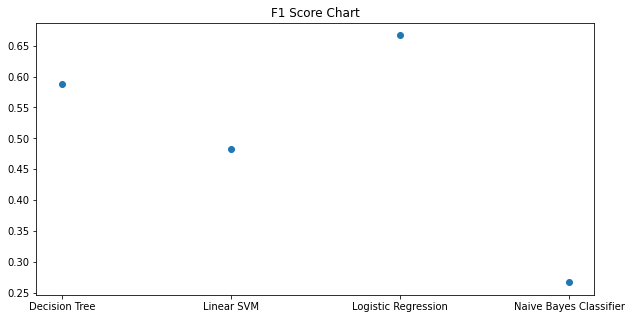

In [112]:
data = {'Decision Tree':f1ScoreDTC, 'Linear SVM':f1ScoreSVC, 'Logistic Regression':f1ScoreLR, 'Naive Bayes Classifier':f1ScoreNB}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("F1 Score Chart") 


plt.scatter(x, y)
plt.show()

Accuracy Score

In [36]:
accuracyDTC = accuracy_score(prediction_decision_tree, y_test)
accuracySVC = accuracy_score(prediction_SVM, y_test)
accuracyLR = accuracy_score(prediction_logistic_regression, y_test)
accuracyNB = accuracy_score(prediction_nb, y_test)

print('Accuracy Score- Decision Tree Classifier: ', accuracyDTC)
print('Accuracy Score- Linear SVM Classifier: ', accuracySVC)
print('Accuracy Score- Logistic Regression Classifier: ', accuracyLR)
print('Accuracy Score- Naive Bayes Classifier: ', accuracyNB)

Accuracy Score- Decision Tree Classifier:  0.9125
Accuracy Score- Linear SVM Classifier:  0.90625
Accuracy Score- Logistic Regression Classifier:  0.93125
Accuracy Score- Naive Bayes Classifier:  0.8625


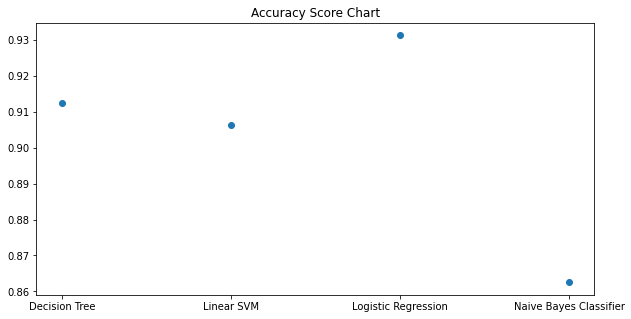

In [111]:
data = {'Decision Tree':accuracyDTC, 'Linear SVM':accuracySVC, 'Logistic Regression':accuracyLR, 'Naive Bayes Classifier':accuracyNB}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("Accuracy Score Chart") 

plt.scatter(x, y)
plt.show()

# Applying SVD Feature Selection on classifiers

In [37]:
svd = TruncatedSVD(n_components=800, random_state=27, n_iter = 30)
reducedTrainSVD = svd.fit_transform(trainDataTrial, label)
pd.DataFrame(reducedTrainSVD).head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,4.209866,-0.733075,-1.570752,-0.766397,-0.393438,0.175756,0.265072,0.055903,0.468170,-0.161659,...,0.271762,-0.571365,-0.434348,0.350460,-1.675651,0.073089,0.301416,0.029130,-1.115207,1.057512
1,3.864993,-0.452234,-1.629992,-1.057283,-0.210888,-0.019759,0.274282,-0.045534,0.042677,-0.043942,...,-0.263202,2.533338,-0.065902,0.010651,-0.153385,1.523213,-0.665576,-1.098252,-1.519661,-1.041647
2,3.767743,-0.568984,-1.656248,-0.999098,-0.223674,0.103720,0.485973,0.119731,0.177672,-0.139598,...,1.358940,0.780513,0.126284,0.047748,1.430632,0.019129,-1.060616,-0.760787,-0.449512,-1.703933
3,3.895825,-0.485487,-1.733745,-0.907969,-0.307753,-0.088896,0.671033,-0.141934,0.011025,0.076621,...,1.272386,2.516159,-0.041876,0.826883,0.879549,-1.138676,-1.049456,-1.259871,0.125262,-1.031144
4,3.881688,-0.209835,-1.515436,-0.900967,-0.206142,0.018235,0.451900,0.097368,0.044001,-0.103369,...,-1.741662,-0.127360,0.996954,0.499876,0.452512,-0.211526,-0.145132,0.082420,-0.034287,0.572985


In [52]:
X_trainSVD, X_testSVD, y_trainSVD, y_testSVD = train_test_split(reducedTrainSVD, label, test_size=0.2, random_state=27)

Decision Tree Classifier

In [71]:
clfSVD = DecisionTreeClassifier(class_weight={0: 1, 1: 2.5}, random_state = 42)
clfSVD.fit(X_trainSVD, y_trainSVD)
prediction_decision_treeSVD = clfSVD.predict(X_testSVD)
prediction_decision_treeSVD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Linear SVM Classifier

In [65]:
linsvcSVD = LinearSVC(random_state=27)
linsvcSVD.fit(X_trainSVD, y_trainSVD)
prediction_SVM_SVD = linsvcSVD.predict(X_testSVD)
prediction_SVM_SVD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Logistic Regression Classifier

In [66]:
x = {0:1, 1:2600}
lrSVD = LogisticRegression(random_state=13, class_weight=x)
lrSVD.fit(X_trainSVD, y_trainSVD)
prediction_logistic_regressionSVD = lrSVD.predict(X_testSVD)
prediction_logistic_regressionSVD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Naive Bayes Classifier

In [67]:
bnbSVD = BernoulliNB(alpha=.75)
bnbSVD.fit(X_trainSVD, y_trainSVD)
prediction_nbSVD = bnbSVD.predict(X_testSVD)
prediction_nbSVD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

F1 Score

In [72]:
f1ScoreDTCsvd = f1_score(y_testSVD, prediction_decision_treeSVD)
f1ScoreSVCsvd = f1_score(y_testSVD, prediction_SVM_SVD)
f1ScoreLRsvd = f1_score(y_testSVD, prediction_logistic_regressionSVD)
f1ScoreNBsvd = f1_score(y_testSVD, prediction_nbSVD)

print('F1 Score- Decision Tree Classifier: ', f1ScoreDTCsvd)
print('F1 Score- Linear SVM Classifier: ', f1ScoreSVCsvd)
print('F1 Score- Logistic Regression Classifier: ', f1ScoreLRsvd)
print('F1 Score- Naive Bayes Classifier: ', f1ScoreNBsvd)

F1 Score- Decision Tree Classifier:  0.5294117647058824
F1 Score- Linear SVM Classifier:  0.16666666666666666
F1 Score- Logistic Regression Classifier:  0.6060606060606061
F1 Score- Naive Bayes Classifier:  0.5625


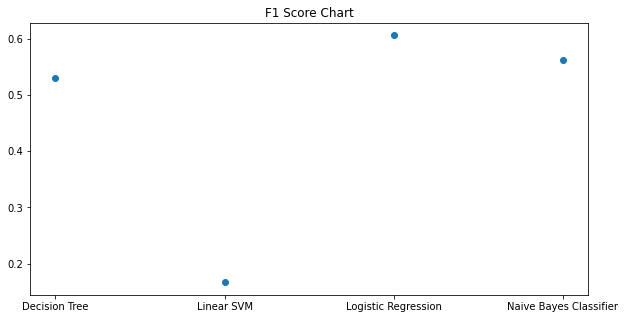

In [109]:
data = {'Decision Tree':f1ScoreDTCsvd, 'Linear SVM':f1ScoreSVCsvd, 'Logistic Regression':f1ScoreLRsvd, 'Naive Bayes Classifier':f1ScoreNBsvd}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("F1 Score Chart") 

plt.scatter(x, y)
plt.show()

Accuracy Score

In [73]:
accuracyDTCsvd = accuracy_score(prediction_decision_treeSVD, y_testSVD)
accuracySVCsvd = accuracy_score(prediction_SVM_SVD, y_testSVD)
accuracyLRsvd = accuracy_score(prediction_logistic_regressionSVD, y_testSVD)
accuracyNBsvd = accuracy_score(prediction_nbSVD, y_testSVD)

print('Accuracy Score- Decision Tree Classifier: ', accuracyDTCsvd)
print('Accuracy Score- Linear SVM Classifier: ', accuracySVCsvd)
print('Accuracy Score- Logistic Regression Classifier: ', accuracyLRsvd)
print('Accuracy Score- Naive Bayes Classifier: ', accuracyNBsvd)

Accuracy Score- Decision Tree Classifier:  0.9
Accuracy Score- Linear SVM Classifier:  0.875
Accuracy Score- Logistic Regression Classifier:  0.91875
Accuracy Score- Naive Bayes Classifier:  0.9125


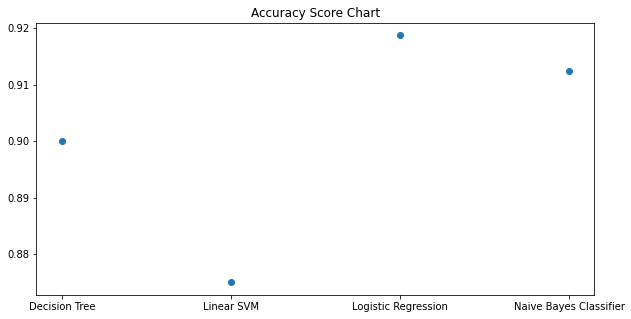

In [110]:
data = {'Decision Tree':accuracyDTCsvd, 'Linear SVM':accuracySVCsvd, 'Logistic Regression':accuracyLRsvd, 'Naive Bayes Classifier':accuracyNBsvd}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("Accuracy Score Chart") 

plt.scatter(x, y)
plt.show()

# Sampling to improve the accuracy

**Random Under Sampler used for sampling the data and then Chi Square feature selection technique.**

Approach-> sampling-shuffling-TrainTestSplit-FeatureSelection-classifier

In [77]:
#Random Under Sampler
rUnder = RandomUnderSampler(random_state=0)
train_resampledUnder, label_resampledUnder = rUnder.fit_resample(trainDataTrial, label)

#shuffling
X_shuffle, y_shuffle = shuffle(train_resampledUnder, label_resampledUnder, random_state=27)

#Train Test Split
X_trainRUnder, X_testRUnder, y_trainRUnder, y_testRUnder = train_test_split(X_shuffle, y_shuffle, test_size=0.2, stratify=y_shuffle, random_state=23)


In [83]:
#Feature Selection- Chi square
kbestRUnder = SelectKBest(score_func=chi2, k=450)
trainRUnderkBest = kbestRUnder.fit_transform(X_trainRUnder, y_trainRUnder)
testRUnderkBest = kbestRUnder.transform(X_testRUnder)

In [91]:
#Decision Tree Classifier 
clfX = DecisionTreeClassifier(random_state = 42)
clfX.fit(trainRUnderkBest, y_trainRUnder)
prediction_decision_treeX = clfX.predict(testRUnderkBest)
#prediction_decision_treeX

#Linear SVM Classifier
linsvcX = LinearSVC(random_state=27)
linsvcX.fit(trainRUnderkBest, y_trainRUnder)
prediction_SVMX = linsvcX.predict(testRUnderkBest)
#prediction_SVMX

#Logistic Regression Classifier
m = {0:1, 1:2600}
lrX = LogisticRegression(random_state=13, class_weight=m)
lrX.fit(trainRUnderkBest, y_trainRUnder)
prediction_logistic_regressionX = lrX.predict(testRUnderkBest)
#prediction_logistic_regressionX

#Naive Bayes Classifier
bnbX = BernoulliNB(alpha=.75)
bnbX.fit(trainRUnderkBest, y_trainRUnder)
prediction_nbX = bnbX.predict(testRUnderkBest)
#prediction_nbX




In [92]:
f1ScoreDTCX = f1_score(y_testRUnder, prediction_decision_treeX)
f1ScoreSVCX = f1_score(y_testRUnder, prediction_SVMX)
f1ScoreLRX = f1_score(y_testRUnder, prediction_logistic_regressionX)
f1ScoreNBX = f1_score(y_testRUnder, prediction_nbX)

print('F1 Score- Decision Tree Classifier: ', f1ScoreDTCX)
print('F1 Score- Linear SVM Classifier: ', f1ScoreSVCX)
print('F1 Score- Logistic Regression Classifier: ', f1ScoreLRX)
print('F1 Score- Naive Bayes Classifier: ', f1ScoreNBX)

F1 Score- Decision Tree Classifier:  0.6666666666666667
F1 Score- Linear SVM Classifier:  0.8484848484848485
F1 Score- Logistic Regression Classifier:  0.6956521739130436
F1 Score- Naive Bayes Classifier:  0.9333333333333333


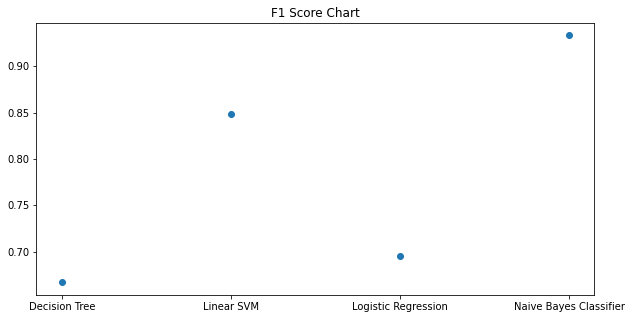

In [100]:
data = {'Decision Tree':f1ScoreDTCX, 'Linear SVM':f1ScoreSVCX, 'Logistic Regression':f1ScoreLRX, 'Naive Bayes Classifier':f1ScoreNBX}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("F1 Score Chart") 


#plt.bar(algorithm, values, width = 0.2)
plt.scatter(x, y)
plt.show()

In [93]:
accuracyDTCX = accuracy_score(prediction_decision_treeX, y_testRUnder)
accuracySVCX = accuracy_score(prediction_SVMX, y_testRUnder)
accuracyLRX = accuracy_score(prediction_logistic_regressionX, y_testRUnder)
accuracyNBX = accuracy_score(prediction_nbX, y_testRUnder)

print('Accuracy Score- Decision Tree Classifier: ', accuracyDTCX)
print('Accuracy Score- Linear SVM Classifier: ', accuracySVCX)
print('Accuracy Score- Logistic Regression Classifier: ', accuracyLRX)
print('Accuracy Score- Naive Bayes Classifier: ', accuracyNBX)

Accuracy Score- Decision Tree Classifier:  0.65625
Accuracy Score- Linear SVM Classifier:  0.84375
Accuracy Score- Logistic Regression Classifier:  0.5625
Accuracy Score- Naive Bayes Classifier:  0.9375


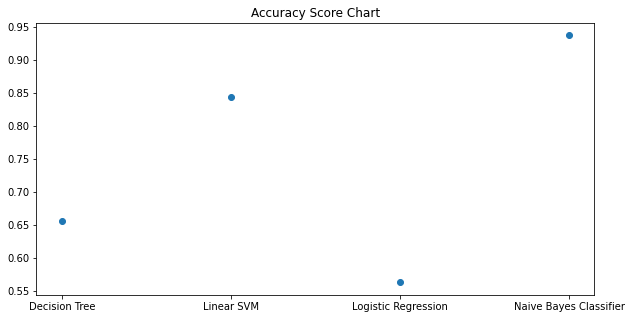

In [102]:
data = {'Decision Tree':accuracyDTCX, 'Linear SVM':accuracySVCX, 'Logistic Regression':accuracyLRX, 'Naive Bayes Classifier':accuracyNBX}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("Accuracy Score Chart") 


#plt.bar(algorithm, values, width = 0.2)
plt.scatter(x, y)
plt.show()

**Random Over Sampler used for sampling the data and then SVD feature selection technique.**

In [117]:
rOver = RandomOverSampler(random_state=0)
train_OverResampled, label_OverResampled = rOver.fit_resample(trainDataTrial, label)

#shuffling
X_shuffleOver, y_shuffleOver = shuffle(train_OverResampled, label_OverResampled, random_state=27)

#Train Test Split
X_trainROver, X_testROver, y_trainROver, y_testROver = train_test_split(X_shuffleOver, y_shuffleOver, test_size=0.2, stratify=y_shuffleOver, random_state=23)




In [118]:
trainOverSVD = svd.fit_transform(X_trainROver, y_trainROver)
testOverSVD = svd.transform(X_testROver)


In [127]:
trainOverSVD1 = svd.transform(X_trainROver)

In [129]:
testActualOverSVD = svd.transform(testDataTrial)

In [134]:
clfX1 = DecisionTreeClassifier(class_weight={0: 1, 1: 1.5})
clfX1.fit(trainOverSVD1, y_trainROver)
pdtc1 = clfX1.predict(testActualOverSVD)

In [133]:
pdtc = clfX.predict(testActualOverSVD)

In [135]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in pdtc1)
resultFile.close()

In [128]:
#Decision Tree Classifier 
clfX = DecisionTreeClassifier(random_state = 42)
clfX.fit(trainOverSVD1, y_trainROver)
prediction_decision_treeX = clfX.predict(testOverSVD)
#prediction_decision_treeX


#Linear SVM Classifier
linsvcX = LinearSVC(random_state=27)
linsvcX.fit(trainOverSVD1, y_trainROver)
prediction_SVMX = linsvcX.predict(testOverSVD)
#prediction_SVMX

#Logistic Regression Classifier
m = {0:1, 1:2600}
lrX = LogisticRegression(random_state=13, class_weight=m)
lrX.fit(trainOverSVD1, y_trainROver)
prediction_logistic_regressionX = lrX.predict(testOverSVD)
#prediction_logistic_regressionX

#Naive Bayes Classifier
bnbX = BernoulliNB(alpha=.75)
bnbX.fit(trainOverSVD1, y_trainROver)
prediction_nbX = bnbX.predict(testOverSVD)
#prediction_nbX

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [120]:
f1ScoreDTCX = f1_score(y_testROver, prediction_decision_treeX)
f1ScoreSVCX = f1_score(y_testROver, prediction_SVMX)
f1ScoreLRX = f1_score(y_testROver, prediction_logistic_regressionX)
f1ScoreNBX = f1_score(y_testROver, prediction_nbX)

print('F1 Score- Decision Tree Classifier: ', f1ScoreDTCX)
print('F1 Score- Linear SVM Classifier: ', f1ScoreSVCX)
print('F1 Score- Logistic Regression Classifier: ', f1ScoreLRX)
print('F1 Score- Naive Bayes Classifier: ', f1ScoreNBX)

F1 Score- Decision Tree Classifier:  0.9764309764309764
F1 Score- Linear SVM Classifier:  0.9931506849315068
F1 Score- Logistic Regression Classifier:  0.9863945578231292
F1 Score- Naive Bayes Classifier:  0.9246575342465754


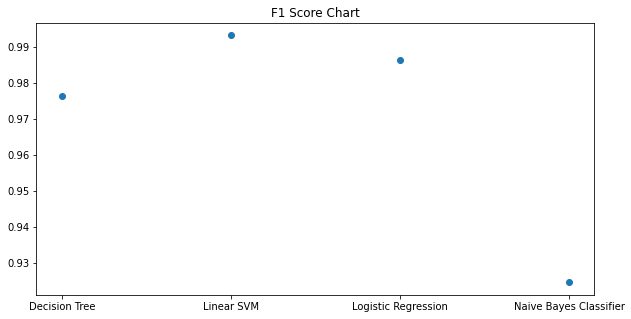

In [125]:
data = {'Decision Tree':f1ScoreDTCX, 'Linear SVM':f1ScoreSVCX, 'Logistic Regression':f1ScoreLRX, 'Naive Bayes Classifier':f1ScoreNBX}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("F1 Score Chart") 


#plt.bar(algorithm, values, width = 0.2)
plt.scatter(x, y)
plt.show()

In [121]:
accuracyDTCX = accuracy_score(prediction_decision_treeX, y_testROver)
accuracySVCX = accuracy_score(prediction_SVMX, y_testROver)
accuracyLRX = accuracy_score(prediction_logistic_regressionX, y_testROver)
accuracyNBX = accuracy_score(prediction_nbX, y_testROver)

print('Accuracy Score- Decision Tree Classifier: ', accuracyDTCX)
print('Accuracy Score- Linear SVM Classifier: ', accuracySVCX)
print('Accuracy Score- Logistic Regression Classifier: ', accuracyLRX)
print('Accuracy Score- Naive Bayes Classifier: ', accuracyNBX)

Accuracy Score- Decision Tree Classifier:  0.9757785467128027
Accuracy Score- Linear SVM Classifier:  0.9930795847750865
Accuracy Score- Logistic Regression Classifier:  0.986159169550173
Accuracy Score- Naive Bayes Classifier:  0.9238754325259516


# FEATURE SELECTION

Chi-Square Feature selection

In [ ]:
kbest = SelectKBest(score_func=chi2, k=30000)
reduced_train = kbest.fit_transform(trainDataTrial, label)
reduced_test = kbest.transform(testDataTrial)

PCA Feature Selection

In [ ]:
pca = PCA(n_components = 100, whiten= True)
train_pca = pca.fit_transform(trainDataTrial)
test_pca = pca.transform(testDataTrial)

# CLASSIFIERS

Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(reduced_train, label)
prediction_decision_tree = clf.predict(reduced_test)
prediction_decision_tree

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in prediction_decision_tree)
resultFile.close()

Linear SVM Classifier

In [ ]:
linsvc = LinearSVC(C=1)
linsvc.fit(reduced_train, label)
prediction_SVM = linsvc.predict(reduced_test)
prediction_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in prediction_SVM)
resultFile.close()

Logistic Regression

In [ ]:
reduced_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x = {0:1, 1:9}
lr = LogisticRegression(random_state=13, class_weight=x)
lr.fit(reduced_train, label)
prediction_logistic_regression = lr.predict(reduced_test)
prediction_logistic_regression

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Naive Bayes Classifier

In [ ]:
bnb = BernoulliNB(alpha=.75)
bnb.fit(train_resampledUnder1, label_resampledUnder1)
results = bnb.predict(reduced_test1)

XG Boost Classifier

In [ ]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(chiTrain, y_train)
prediction_xgb = xgb_cl.predict(chiTest)

# SAMPLING

**Over Sampling**

Random Over Sampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train_resampled, label_resampled = ros.fit_resample(sparse_train, label)
print(sorted(Counter(label_resampled).items()),label_resampled.shape)

SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(trainDataTrial, label)

**Under Sampling**

Random Under Sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rosUnder = RandomUnderSampler(random_state=0)
train_resampledUnder, label_resampledUnder = rosUnder.fit_resample(sparse_train, label)
print(sorted(Counter(label_resampledUnder).items()),label_resampledUnder.shape)

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shuffle,y_shuffle, test_size=0.2, stratify=y_shuffle)

# Shuffling the data

In [ ]:
X_shuffle, y_shuffle = shuffle(X, y, random_state=27)

## F1 Score

In [ ]:
Rf = f1_score(y_test, prediction_xgb)
print('F1 Score:', Rf)

# New Way

In [ ]:
kbest = SelectKBest(score_func=chi2, k=30000)
chiTrain = kbest.fit_transform(X_train, y_train)
chiTest = kbest.transform(X_test)

In [ ]:
pca = PCA(n_components = 100, whiten= True)
pcaTrain = pca.fit_transform(chiTrain)
pcaTest = pca.transform(chiTest)

In [ ]:
#SVD Feature Selection
svd =  TruncatedSVD(n_components = 1000)
trainDataSVD = svd.fit_transform(X_train)
validationDataSVD = svd.transform(X_test)
pd.DataFrame(trainDataSVD)

In [ ]:
##Decision Tree
clf1 = DecisionTreeClassifier(random_state = 42)
clf1.fit(pcaTrain, y_train)
prediction_decision_tree1 = clf1.predict(pcaTest)
prediction_decision_tree1

In [ ]:
#XGB Classifier
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(chiTrain, y_train)
prediction_xgb = xgb_cl.predict(chiTest)

F1 Score Accuracy

In [ ]:
Rf = f1_score(y_test, prediction_xgb)
print('F1 Score:', Rf)
metrics.accuracy_score(y_test, prediction_xgb)



F1 Score: 0.9550173010380624


0.9550173010380623

In [ ]:
Rf12 = f1_score(y_test, prediction_decision_tree1)
Rf12

0.9494949494949494

In [ ]:
prediction_decision_tree1

In [ ]:
#upload on miner test data low prediction score
chiActualTest = kbest.transform(testDataTrial)
prediction_xgb1 = xgb_cl.predict(chiActualTest)

In [ ]:
prediction_decision_tree1 = clf1.predict(chiActualTest)

In [ ]:
prediction_xgb1

In [ ]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in prediction_xgb1)
resultFile.close()

# Working on actual test data

Approach 1 - 38% on miner

In [ ]:
kbest = SelectKBest(score_func=chi2, k=30000)
reduced_train = kbest.fit_transform(trainDataTrial, label)
reduced_test = kbest.transform(testDataTrial)

oversample = SMOTE()
X, y = oversample.fit_resample(reduced_train, label)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X, y)
prediction_decision_tree = clf.predict(reduced_test)
prediction_decision_tree



Approach 2- Chi Square, RandomUnderSampler, BernoulliNB
Accuracy on Miner- 73%

In [104]:
kbest1 = SelectKBest(score_func=chi2, k=450)
reduced_train1 = kbest1.fit_transform(trainDataTrial, label)
reduced_test1 = kbest1.transform(testDataTrial)

rosUnder1 = RandomUnderSampler(random_state=0)
train_resampledUnder1, label_resampledUnder1 = rosUnder1.fit_resample(reduced_train1, label)

bnb = BernoulliNB(alpha=.75)
bnb.fit(train_resampledUnder1, label_resampledUnder1)
prediction = bnb.predict(reduced_test1)


In [105]:
prediction

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
pd.DataFrame(prediction).value_counts()

0    320
1     30
dtype: int64

In [ ]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in prediction)
resultFile.close()

Approach 3 -> SVD used for feature selection and Decision Tree used as a classifier 

In [46]:
svd_trunc = TruncatedSVD(algorithm='randomized', n_components=800, n_iter=30, random_state=42)
svd_trunc_m = svd_trunc.fit(trainDataTrial, label)
reduced_features = svd_trunc_m.transform(trainDataTrial)

In [55]:
validationDataSVDTest = svd_trunc.transform(testDataTrial)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(reduced_features,label, test_size=0.2, random_state=123)

In [57]:
dtc = DecisionTreeClassifier(random_state=53,class_weight={0: 1, 1: 1.5})
dtc.fit(X_train,y_train)
predict_decision_tree = dtc.predict(X_test)

In [58]:
f1Scoredtc = f1_score(y_test, predict_decision_tree)
print('F1 Score- Decision Tree Classifier:', f1Scoredtc)

F1 Score- Decision Tree Classifier: 0.5625


In [59]:
#Miner
dtc.fit(X_train,y_train)
predict_dtc = dtc.predict(validationDataSVDTest)

In [60]:
predict_dtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
resultFile = open('format.txt', 'w')
resultFile.writelines("%s\n" % val for val in predict_dtc)
resultFile.close()

Approach 4 -> Used chi square and then applied PCA as a feature selection on the Decision Tree classifier

In [ ]:
#upload on miner test data- 63%
#format(8).txt
chiActualTest = kbest.transform(testDataTrial)
pcaActualTest = pca.transform(chiActualTest)
prediction_decision_tree1 = clf1.predict(pcaActualTest)